# **MNIST classification with TensorFlow model**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/Python/ICA'
os.chdir(workdir_path)
sys.path.append(workdir_path)

Predictions 

In [21]:
import tensorflow as tf
import argparse 
import time
import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

tf.reset_default_graph()

# load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('tensorflowModel_graph_frozen.pb')

with graph.as_default():
  # We access the input and output nodes 
  input_node = graph.get_tensor_by_name('prefix/x_1:0')
  input_2 = graph.get_tensor_by_name('prefix/keep_prob:0')
  output_node = graph.get_tensor_by_name('prefix/Softmax:0')
      


7377
real value:  9
prediction:  9


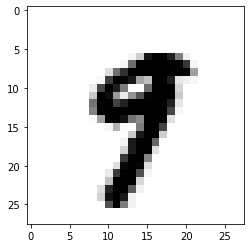

In [24]:
# We launch a Session
sess = tf.Session(graph=graph)

j=randint(1, mnist.test.images.shape[0])
print(j)
plt.imshow(mnist.test.images[j].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("real value: ", argmax(mnist.test.labels[j:j+1]))
print("prediction: ", argmax(sess.run(output_node, feed_dict={input_node: mnist.test.images[j:j+1], input_2: 1.0})))

In [25]:
sess.run(output_node, feed_dict={input_node: mnist.test.images[0:1000], input_2: 1.0})

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [26]:
times_batch4=[]
start_time=time.time()
for x in range(100):
  start_time_one_batch=time.time()
  sess.run(output_node, feed_dict={input_node: mnist.test.images[0:4], input_2: 1.0})
  end_time_one_batch=time.time()
  times_batch4.append((end_time_one_batch-start_time_one_batch)*1000)
end_time=time.time()
print("Time in sec: ",(end_time-start_time)*1)

Time in sec:  0.12166714668273926


In [27]:
times_batch1000=[]
start_time=time.time()
for x in range(1000):
  start_time_one_batch=time.time()
  sess.run(output_node, feed_dict={input_node: mnist.test.images[0:1000], input_2: 1.0})
  end_time_one_batch=time.time()
  times_batch1000.append((end_time_one_batch-start_time_one_batch)*1000)
end_time=time.time()
print("Time in sec: ",(end_time-start_time)*1)

Time in sec:  6.93671989440918


Average time [ms]:  1.2127184867858887


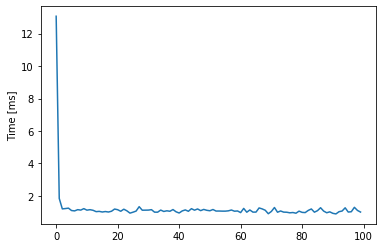

In [30]:
plt.plot(times_batch4[:])
plt.ylabel('Time [ms]')
print('Average time [ms]: ',sum(times_batch4[:])/len(times_batch4[:]))

Average time [ms]:  6.934325218200684


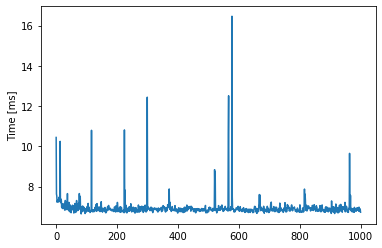

In [31]:
plt.plot(times_batch1000[:])
plt.ylabel('Time [ms]')
print('Average time [ms]: ',sum(times_batch1000[:])/len(times_batch1000[:]))